<a href="https://colab.research.google.com/github/oganiler/google_colab/blob/main/Linear_Classification_by_Tfdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#load the data
data = load_breast_cancer()
print("data type:", type(data))
print("data.data type:", type(data.data), "\n")

#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
#Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
print("split type:", type(X_train), "\n")

N, D = X_train.shape

print("data.data", data.data.shape)
print("data.target", data.target.shape, "\n")
print("X_train (N,D):", X_train.shape)
print("y_train", y_train.shape, "\n")
print("X_test", X_test.shape)
print("y_test", y_test.shape, "\n")

print("Binary Output:", data.target_names, "\n")
print("Input Features (D):", data.feature_names)

data type: <class 'sklearn.utils._bunch.Bunch'>
data.data type: <class 'numpy.ndarray'> 

split type: <class 'numpy.ndarray'> 

data.data (569, 30)
data.target (569,) 

X_train (N,D): (381, 30)
y_train (381,) 

X_test (188, 30)
y_test (188,) 

Binary Output: ['malignant' 'benign'] 

Input Features (D): ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
#normalize the data
with np.printoptions(suppress=True, precision=2):
  print("Input features before normalize:", X_train[:1], "\n") #First row as a 2D array (keeps “batch” dimension)

#feature-wise (column-wise) standardization where mean = 0 and variance = std =  1.0
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with np.printoptions(suppress=True, precision=2):
  print("Input features after normalize:", X_train[:1], "\n") #First row as a 2D array (keeps “batch” dimension)

Input features before normalize: [[ 16.3   15.7  104.7  819.8    0.09   0.07   0.06   0.05   0.17   0.06
    0.21   0.47   1.15  20.67   0.01   0.01   0.02   0.01   0.01   0.
   17.32  17.76 109.8  928.2    0.14   0.14   0.19   0.14   0.23   0.07]] 

Input features after normalize: [[ 0.64 -0.86  0.54  0.49 -0.18 -0.72 -0.41 -0.09 -0.38 -0.92 -0.74 -1.38
  -0.88 -0.46  0.08 -0.76 -0.22  0.4  -0.89 -0.47  0.25 -1.31  0.1   0.12
   0.14 -0.74 -0.34  0.35 -0.98 -0.66]] 



In [4]:
#build the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(D,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

for w in model.weights:
    print(w.name, w.shape)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,049 (8.00 KB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 0 (0.00 B)

kernel (30, 64)
bias (64,)
kernel (64, 1)
bias (1,)


In [5]:
#compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fit the model in old way (without tensor flow batching)
# r = model.fit(X_train,
#               y_train,
#               validation_data=(X_test, y_test),
#               epochs=15)

In [6]:
#fit the model by TensorFlow data using batching

#Create Tensorflow Datasets
train_tf_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_tf_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
type(train_tf_dataset)

r = model.fit(train_tf_dataset.batch(32),
              validation_data=test_tf_dataset.batch(32),
              epochs=15)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7182 - loss: 0.5443 - val_accuracy: 0.9415 - val_loss: 0.3276
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9174 - loss: 0.3154 - val_accuracy: 0.9574 - val_loss: 0.2200
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9325 - loss: 0.2209 - val_accuracy: 0.9574 - val_loss: 0.1724
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9481 - loss: 0.1766 - val_accuracy: 0.9574 - val_loss: 0.1463
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9589 - loss: 0.1515 - val_accuracy: 0.9574 - val_loss: 0.1295
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9589 - loss: 0.1347 - val_accuracy: 0.9628 - val_loss: 0.1174
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.1222 - val_accuracy: 0.9628 - val_loss: 0.1080
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9783 - loss: 0.1122 - val_accuracy: 0.9628 - val_loss

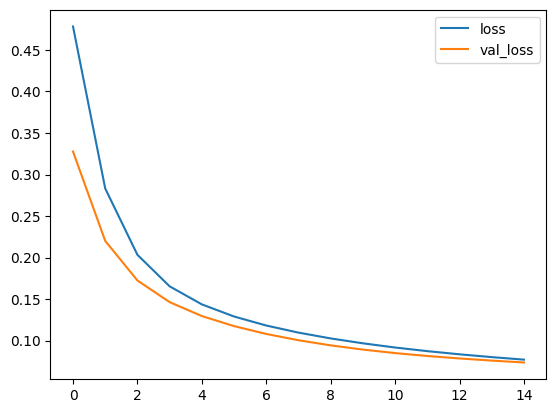

In [7]:
#Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

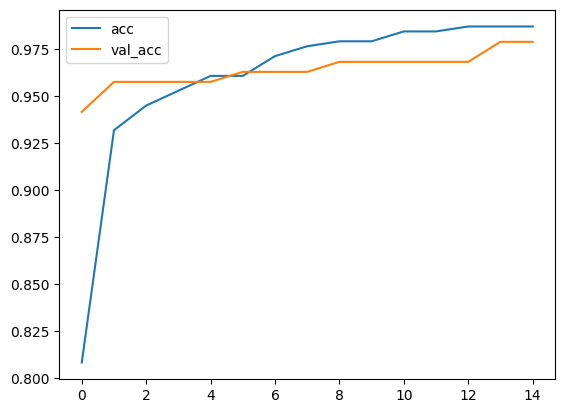

In [8]:
#Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [9]:
#Evaluate the Model
print("Evaluate on test data")
print(model.evaluate(test_tf_dataset.batch(32)))

Evaluate on test data
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9853 - loss: 0.0698 
[0.07364989817142487, 0.978723406791687]
